In [2]:
import pandas as pd
import missingno as msno 
from numpy import nan as np
import matplotlib.pyplot as plt
from pandas.core.groupby import groupby
import datetime
import plotly.graph_objs as gro
from collections import Counter as co
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
url = 'https://raw.githubusercontent.com/shecho30/Diplomado_python/main/Data/Video_Game.csv'

In [4]:
df = pd.read_csv(url, sep=',')

In [5]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#ajustar variables
df = df[df["Year_of_Release"].notnull()]
df = df[df["Genre"].notnull()]
df = df[df["Publisher"].notnull()]
df['Year_of_Release']=df['Year_of_Release'].astype('int64')
df['User_Score']=df['User_Score'].replace('tbd',0).astype('float64')

In [7]:
# Eliminar cualquier fila que contenga valores nulos o faltantes
df = df.dropna()

In [8]:
df['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [12]:
df['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [13]:
genre = df.groupby('Genre')['Genre'].count()
genre

Genre
Action          1630
Adventure        248
Fighting         378
Misc             384
Platform         403
Puzzle           118
Racing           581
Role-Playing     712
Shooter          864
Simulation       297
Sports           943
Strategy         267
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Videojuegos por genero')

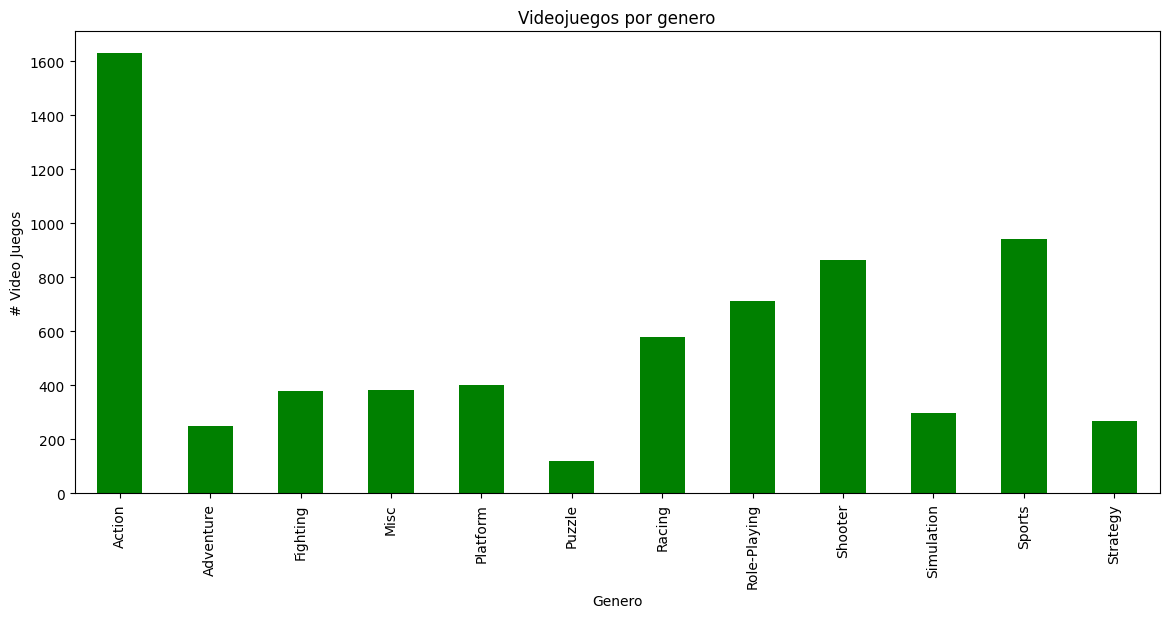

In [14]:
plt.figure(figsize=(14,6))
genre.plot(kind='bar', color='Green')
plt.xlabel('Genero')
plt.ylabel('# Video Juegos')
plt.title('Videojuegos por genero')

In [17]:
df['Year'] = df.Year_of_Release.astype(int,errors='ignore')
Sales = df.groupby('Year')['Global_Sales'].sum()
Sales.head(20)

Year
1985      0.03
1988      0.03
1992      0.03
1994      1.27
1996     20.10
1997     35.01
1998     43.18
1999     51.17
2000     81.24
2001    253.88
2002    288.84
2003    255.35
2004    321.78
2005    334.32
2006    416.72
2007    456.23
2008    489.12
2009    459.85
2010    412.96
2011    383.69
Name: Global_Sales, dtype: float64

In [18]:
Years_ = [1980, 1985, 1990, 1995, 2000, 2005, 2010]
Sales_Years_ = df.query('Year in @Years_')
Sales_Years_.head(5)

Sales_2 = Sales_Years_.groupby('Year')['Global_Sales'].sum()
Sales_2.head(20)

Year
1985      0.03
2000     81.24
2005    334.32
2010    412.96
Name: Global_Sales, dtype: float64

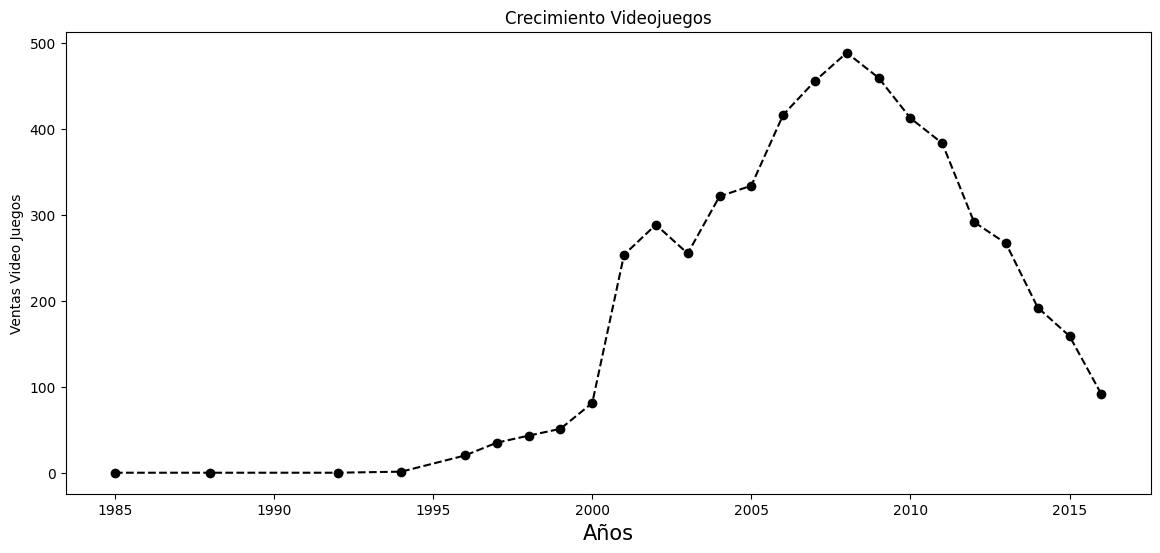

In [19]:
plt.figure(figsize=(14,6))
Sales.plot(style='--',color = 'black', marker = 'o')
plt.ylabel('Ventas Video Juegos')
plt.title('Crecimiento Videojuegos')
plt.xlabel("Años",fontsize=15);

<ipython-input-20-aa29bb783513>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



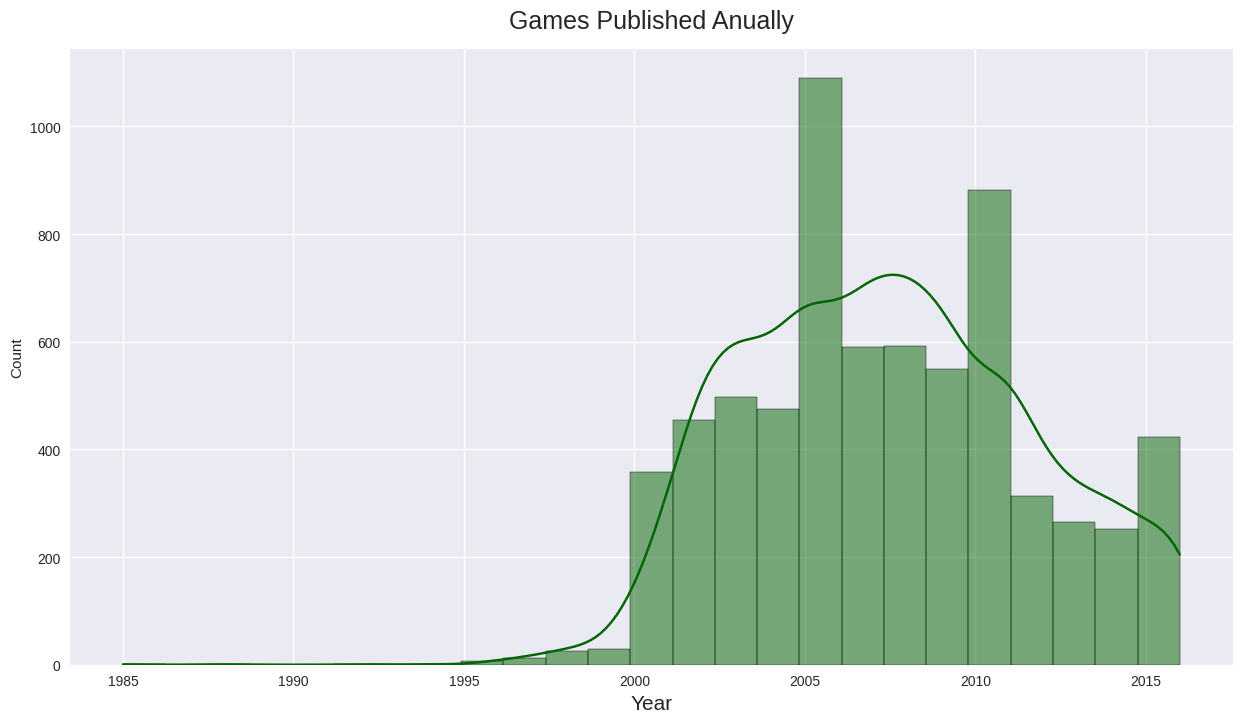

In [20]:
plt.style.use("seaborn")

fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(df["Year_of_Release"], color="darkgreen", kde=True, bins=25)
plt.title("Games Published Anually", fontsize=18, y=1.02)
ax.set_xlabel("Year",fontsize=15);

In [24]:
# Separar las datos en dos una variable X de entregada y una y de salida.
X = df[['Year_of_Release']]  
y = df['Global_Sales']

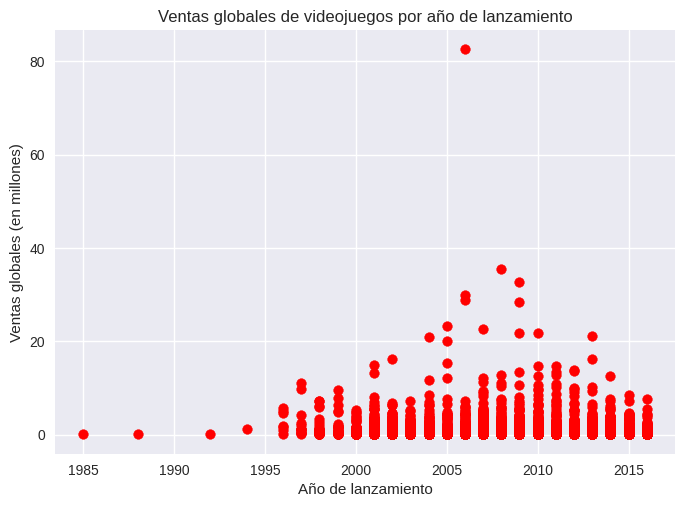

In [34]:
# Graficar los datos de prueba y las predicciones del modelo
plt.scatter(X, y, color='red')
plt.title('Ventas globales de videojuegos por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.show()

In [22]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# Entrenar el modelo de regresión lineal con los datos de entrenamiento
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = regressor.predict(X_test)

In [35]:
# Calcular el coeficiente de determinación R2
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

R2: -0.0011830731853614829


In [36]:
df_ps2 = df.loc[df['Platform'] == 'XOne']

In [37]:
# Separar los datos en variables de entrada (X) y salida (y)
X = df_ps2[['Year_of_Release']]  # Solo usamos el año de lanzamiento como variable de entrada
y = df_ps2['Global_Sales']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Entrenar el modelo de regresión lineal con los datos de entrenamiento
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = regressor.predict(X_test)

MSE: 0.8921773694298545


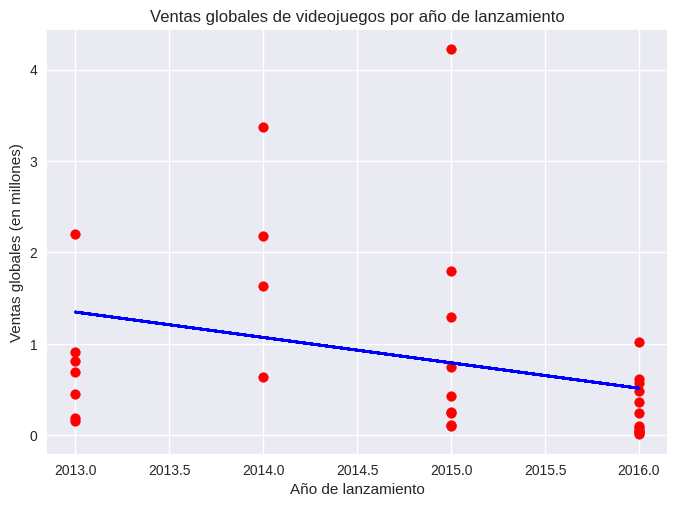

In [40]:
# Calcular el error cuadrático medio (MSE) del modelo
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Graficar los datos de prueba y las predicciones del modelo
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Ventas globales de videojuegos por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.show()

La gráfica de regresión en el ejercicio de videojuegos muestra la relación entre la variable independiente (año de lanzamiento) y la variable dependiente (ventas globales). La línea de regresión trazada a través de los puntos de datos indica la tendencia general de la relación entre estas dos variables.

La pendiente de la línea de regresión indica el cambio en las ventas globales en respuesta a un cambio en el año de lanzamiento. Si la pendiente es positiva, esto indica que a medida que el año de lanzamiento aumenta, las ventas globales también tienden a aumentar. Si la pendiente es negativa, esto indica que a medida que el año de lanzamiento aumenta, las ventas globales tienden a disminuir.



In [41]:
# Calcular el coeficiente de determinación R2
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

R2: 0.07447930127239188


In [42]:
# Ajustar un modelo polinomial de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)


In [43]:
# Calcular los valores predichos y el R2 polinomial
y_pred = model.predict(X_poly)
r2_poly = r2_score(y, y_pred)

In [44]:
# Imprimir el valor de R2 polinomial
print('R2 polinomial:', r2_poly)

R2 polinomial: 0.07608804862994711


<ipython-input-45-413408057f7d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



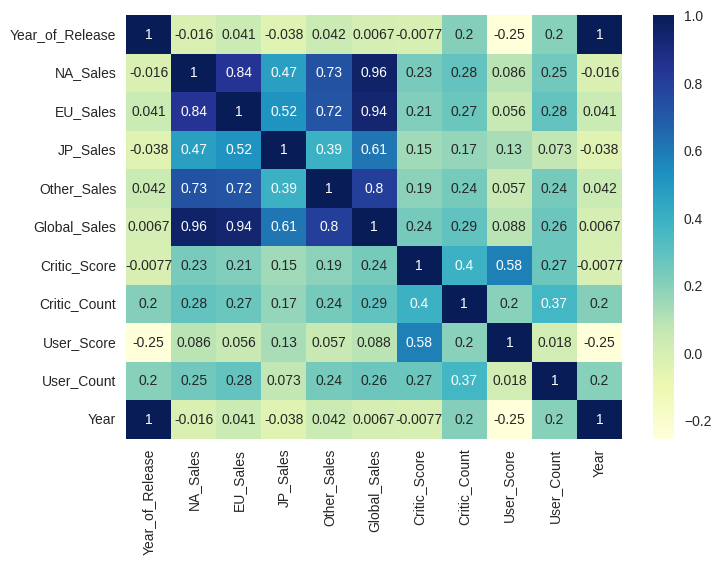

In [45]:
correlation_matrix = df.corr()

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Mostrar el mapa de calor
plt.show()

In [46]:
df_3 = df.loc[df['Platform'] == 'XOne']

In [47]:
# Separar los datos en variables de entrada (X) y salida (y)
X = df_3[['Critic_Score']]  # Solo usamos el año de lanzamiento como variable de entrada
y = df_3['Global_Sales']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# Entrenar el modelo de regresión lineal con los datos de entrenamiento
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = regressor.predict(X_test)

MSE: 0.4176317442002683


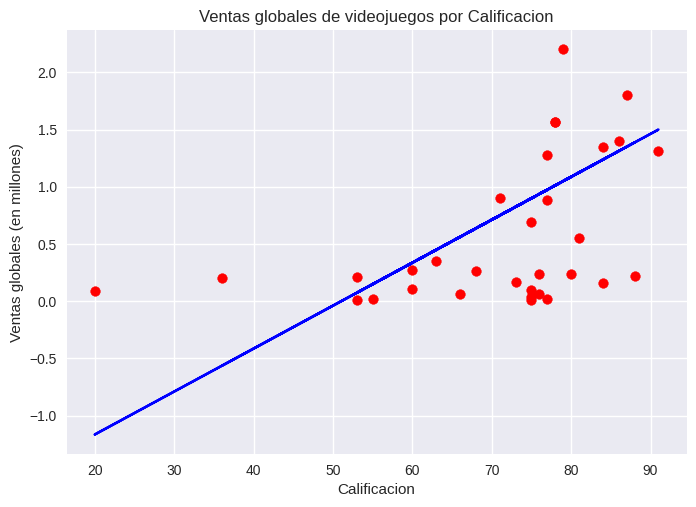

In [50]:
# Calcular el error cuadrático medio (MSE) del modelo

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Graficar los datos de prueba y las predicciones del modelo
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Ventas globales de videojuegos por Calificacion')
plt.xlabel('Calificacion')
plt.ylabel('Ventas globales (en millones)')
plt.show()

In [51]:
# Calcular el coeficiente de determinación R2
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

R2: -0.06032490486832587


In [52]:
# Ajustar un modelo polinomial de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)


In [53]:
# Calcular los valores predichos y el R2 polinomial
y_pred = model.predict(X_poly)
r2_poly = r2_score(y, y_pred)

In [54]:
# Imprimir el valor de R2 polinomial
print('R2 polinomial:', r2_poly)

R2 polinomial: 0.2125571046657999


Este código creará un gráfico de dispersión donde se mostrará la relación entre el año de lanzamiento y las ventas globales de los videojuegos. Cada punto será coloreado según el cluster al que pertenece, determinado por el algoritmo K-means.